In [45]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [46]:
IMAGE_PATH = './PoVeKamon/Images/'
DATA_PATH = IMAGE_PATH + 'Data/'
object = IMAGE_PATH + 'Object2.png'
object = cv2.imread(object)
data = [cv2.imread(DATA_PATH + img) for img in os.listdir(DATA_PATH)]
print(data)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [47]:
akaze = cv2.AKAZE_create()

In [48]:
# Preprocess Image Object

rgb_object = cv2.cvtColor(object, cv2.COLOR_BGR2RGB)

gray_object = cv2.cvtColor(rgb_object, cv2.COLOR_RGB2GRAY)

gray_object = cv2.equalizeHist(gray_object, None)

gray_object = cv2.medianBlur(gray_object, 5)



object_keypoint, object_descriptor = akaze.detectAndCompute(gray_object, None)

object_descriptor = np.float32(object_descriptor)

In [49]:
best_matches = 0

for index, img in enumerate(data):
    
    rgb_data = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    gray_data = cv2.cvtColor(rgb_data, cv2.COLOR_RGB2GRAY)

    gray_data = cv2.equalizeHist(gray_data)

    gray_data = cv2.GaussianBlur(gray_data, (3, 3), 0)

    data_keypoint, data_descriptor = akaze.detectAndCompute(gray_data, None)

    data_descriptor = np.float32(data_descriptor)

    flann = cv2.FlannBasedMatcher(dict(algorithm = 1), dict(checks=50))

    matches = flann.knnMatch(object_descriptor, data_descriptor, 2)
    matchesmask = [[0,0] for _ in range(len(matches))]

    current_matches = 0

    for i, (f, s) in enumerate(matches):
        if f.distance < 0.7 * s.distance:
            matchesmask[i] = [1,0]
            current_matches +=1
    
    if best_matches < current_matches:
        best_matches = current_matches
        data_best_match = {
            "image_data": rgb_data,
            "keypoint": data_keypoint,
            "descriptor": data_descriptor,
            "matches": matches,
            "matchesmask": matchesmask
        }




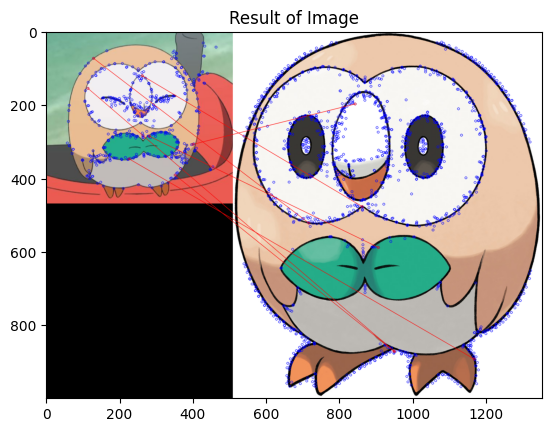

In [50]:
result = cv2.drawMatchesKnn(
    rgb_object,
    object_keypoint,
    data_best_match['image_data'],
    data_best_match['keypoint'],
    matches1to2=data_best_match['matches'],
    outImg=None,
    matchColor=[255,0,0],
    singlePointColor=[0,0,255],
    matchesMask=data_best_match['matchesmask']
)
plt.figure()
plt.imshow(result)
plt.title('Result of Image')
plt.show()